In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

In [94]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Preprocess Data

In [95]:
# df = pd.read_csv("imported_cars_2020-10-27 12_45_55.csv")
df = pd.read_csv("imported_cars_2020-11-05 09_42_51.csv")
df['Brand Name'].replace('-',np.NaN,inplace=True)
df.dropna(subset = ["Brand Name"], inplace=True)
df = df[df['Brand Name'].map(len) <= 13]
df.iloc[4279]

ID                                                                 11708
Published                                                           True
Brand Name                                                        TOYOTA
Car Name                                               Toyota Yaris 2015
Color                                                              white
Main Category                                                     Toyota
Sub Category                                                       Yaris
Model                                                                NaN
Engine                                                           1300 CC
Mileage                                                         6**** km
Hand Drive                                                         R.H.D
Licence Plate Color                                                Black
Licence Plate No                                                 2Q/****
Chassis Number                                     

## Visualize the number of occurrance of Brands

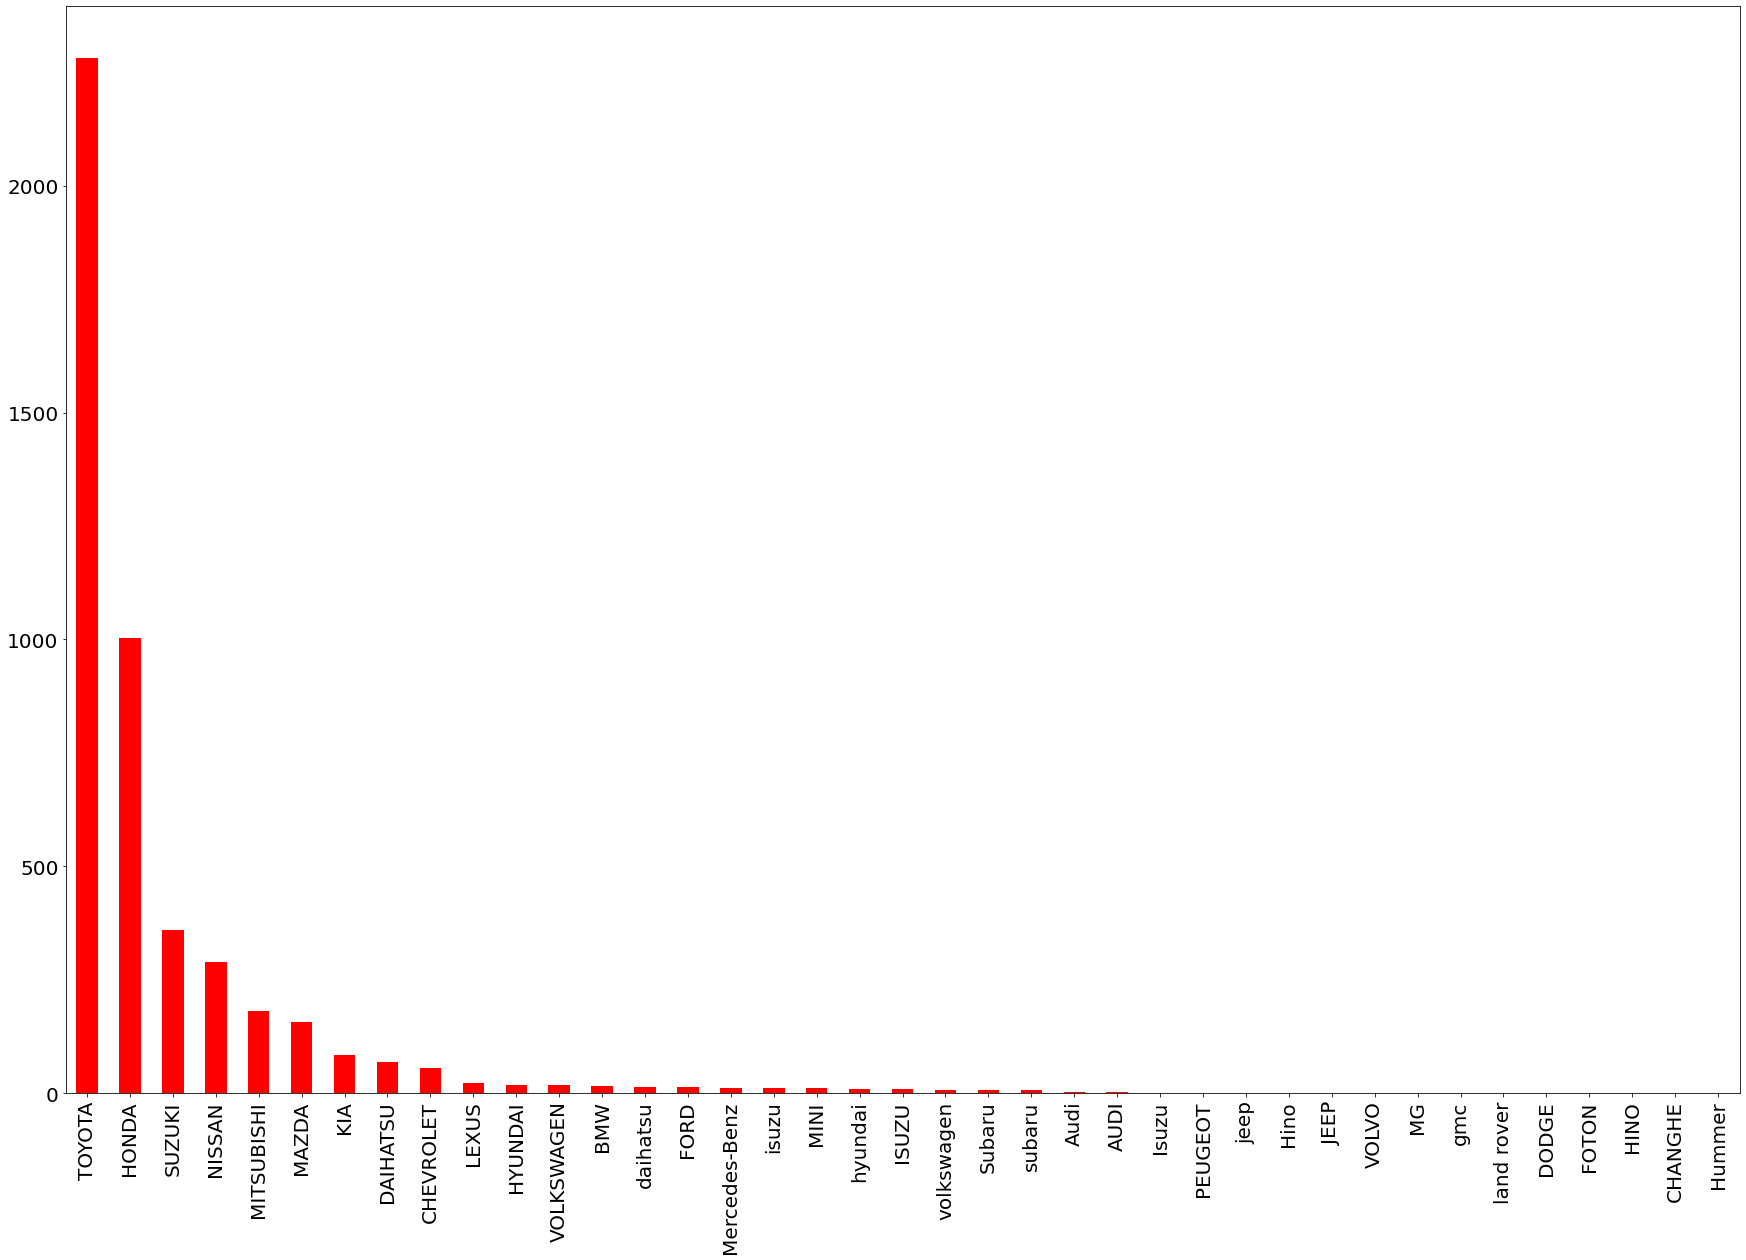

In [101]:
df['Brand Name'].value_counts().plot(kind='bar',figsize=(30, 20),color='r')
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

In [57]:
y = df['Brand Name']
long_y = [i for i in y if len(i) > 7]
# long_y
y

0           TOYOTA
1            MAZDA
2           TOYOTA
3       MITSUBISHI
4           TOYOTA
           ...    
4705        TOYOTA
4706         HONDA
4707        TOYOTA
4708    MITSUBISHI
4709        SUZUKI
Name: Brand Name, Length: 4696, dtype: object

In [58]:
x = df['Post Detail']
type(x)

pandas.core.series.Series

## Changing ASCII code for x 

In [59]:
import re
# x = x[0].split('\n')
ascii_x = []
for post in x:
    lines = post.split('\n')
    ascii_char= []
    for line in lines:
        for word in line:
            for char in word:
#                 ascii_x.append(ord(char.lower())/1000)
                ascii_char.append(ord(char.lower()))
#                 print(char,'a')
    ascii_x.append(ascii_char)

In [60]:
df_x = pd.DataFrame(ascii_x)

In [61]:
df_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446,3447,3448,3449,3450,3451,3452,3453,3454,3455,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3510,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3541,3542,3543,3544,3545,3546,3547,3548,3549,3550,3551,3552,3553,3554,3555,3556,3557,3558,3559,3560,3561,3562,3563,3564,3565,3566,3567,3568,3569,3570,3571,3572,3573,3574,3575,3576,3577,3578,3579,3580,3581,3582,3583,3584,3585,3586,3587,3588,3589,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599,3600,3601,3602,3603,3604,3605,3606,3607,3608,3609,3610,3611,3612,3613,3614,3615,3616,3617,3618,3619,3620,3621,3622,3623,3624,3625,3626,3627,3628,3629,3630,3631,3632,3633,3634,3635,3636,3637,3638,3639,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650,3651,3652,3653,3654,3655,3656,3657,3658,3659,3660,3661,3662,3663,3664,3665,3666,3667,3668,3669,3670,3671,3672,3673,3674,3675,3676,3677,3678,3679,3680,3681,3682,3683
0,112,108,101,97,115,101,32,97.0,100.0,109.0,105.0,110.0,99.0,114.0,111.0,119.0,110.0,32.0,4096.0,4141.0,4143.0,4121.0,4157.0,32.0,115.0,109.0,97.0,114.0,116.0,32.0,4096.0,4154.0,4096.0,4154.0,32.0,4098.0,4123.0,4141.0,4112.0,4153.0,32.0,4129.0,4155.0,4117.0,4106.0,4153.0,4151.0,32.0,4101.0,4142.0,4152.0,4097.0,4154.0,4100.0,4153.0,4126.0,4144.0,4121.0,4154.0,4140.0,4152.0,32.0,4129.0,4112.0,4156.0,4096.0,4153.0,32.0,4096.0,4140.0,4152.0,32.0,4145.0,4096.0,4140.0,4100.0,4153.0,4152.0,32.0,4096.0,4140.0,4152.0,4126.0,4116.0,4153.0,4244.0,4145.0,4124.0,4152.0,32.0,4112.0,4101.0,4142.0,4152.0,32.0,4145.0,4123.0,4140.0,4100.0,4153.0,4152.0,4117.0,4139.0,4123.0,4145.0,4101.0,116.0,111.0,121.0,111.0,116.0,97.0,32.0,99.0,114.0,111.0,119.0,110.0,45.0,32.0,114.0,111.0,121.0,97.0,108.0,32.0,115.0,97.0,108.0,111.0,111.0,110.0,45.0,32.0,109.0,111.0,100.0,101.0,108.0,46.0,50.0,48.0,48.0,51.0,32.0,110.0,111.0,118.0,101.0,109.0,98.0,101.0,114.0,32.0,108.0,97.0,116.0,101.0,45.0,32.0,101.0,110.0,103.0,105.0,110.0,101.0,32.0,112.0,111.0,119.0,101.0,114.0,46.0,50.0,46.0,53.0,99.0,99.0,32.0,45.0,32.0,100.0,52.0,32.0,47.0,32.0,40.0,32.0,50.0,32.0,119.0,100.0,41.0,45.0,32.0,112.0,114.0,101.0,109.0,105.0,117.0,109.0,32.0,103.0,114.0,97.0,100.0,101.0,32.0,4129.0,4121.0,4157.0,4116.0,4153.0,45.0,32.0,106.0,101.0,108.0,108.0,121.0,32.0,4155.0,4118.0,4101.0,4153.0,32.0,47.0,32.0,4116.0,4100.0,4153.0,4152.0,4117.0,4124.0,4141.0,4112.0,4153.0,32.0,4145.0,4120.0,4140.0,4100.0,4153.0,32.0,4145.0,4123.0,4140.0,4096.0,4153.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## FIll Null values with zero

In [62]:
df_x.fillna(0,inplace=True)

In [63]:
df_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446,3447,3448,3449,3450,3451,3452,3453,3454,3455,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3510,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3541,3542,3543,3544,3545,3546,3547,3548,3549,3550,3551,3552,3553,3554,3555,3556,3557,3558,3559,3560,3561,3562,3563,3564,3565,3566,3567,3568,3569,3570,3571,3572,3573,3574,3575,3576,3577,3578,3579,3580,3581,3582,3583,3584,3585,3586,3587,3588,3589,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599,3600,3601,3602,3603,3604,3605,3606,3607,3608,3609,3610,3611,3612,3613,3614,3615,3616,3617,3618,3619,3620,3621,3622,3623,3624,3625,3626,3627,3628,3629,3630,3631,3632,3633,3634,3635,3636,3637,3638,3639,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650,3651,3652,3653,3654,3655,3656,3657,3658,3659,3660,3661,3662,3663,3664,3665,3666,3667,3668,3669,3670,3671,3672,3673,3674,3675,3676,3677,3678,3679,3680,3681,3682,3683
0,112,108,101,97,115,101,32,97.0,100.0,109.0,105.0,110.0,99.0,114.0,111.0,119.0,110.0,32.0,4096.0,4141.0,4143.0,4121.0,4157.0,32.0,115.0,109.0,97.0,114.0,116.0,32.0,4096.0,4154.0,4096.0,4154.0,32.0,4098.0,4123.0,4141.0,4112.0,4153.0,32.0,4129.0,4155.0,4117.0,4106.0,4153.0,4151.0,32.0,4101.0,4142.0,4152.0,4097.0,4154.0,4100.0,4153.0,4126.0,4144.0,4121.0,4154.0,4140.0,4152.0,32.0,4129.0,4112.0,4156.0,4096.0,4153.0,32.0,4096.0,4140.0,4152.0,32.0,4145.0,4096.0,4140.0,4100.0,4153.0,4152.0,32.0,4096.0,4140.0,4152.0,4126.0,4116.0,4153.0,4244.0,4145.0,4124.0,4152.0,32.0,4112.0,4101.0,4142.0,4152.0,32.0,4145.0,4123.0,4140.0,4100.0,4153.0,4152.0,4117.0,4139.0,4123.0,4145.0,4101.0,116.0,111.0,121.0,111.0,116.0,97.0,32.0,99.0,114.0,111.0,119.0,110.0,45.0,32.0,114.0,111.0,121.0,97.0,108.0,32.0,115.0,97.0,108.0,111.0,111.0,110.0,45.0,32.0,109.0,111.0,100.0,101.0,108.0,46.0,50.0,48.0,48.0,51.0,32.0,110.0,111.0,118.0,101.0,109.0,98.0,101.0,114.0,32.0,108.0,97.0,116.0,101.0,45.0,32.0,101.0,110.0,103.0,105.0,110.0,101.0,32.0,112.0,111.0,119.0,101.0,114.0,46.0,50.0,46.0,53.0,99.0,99.0,32.0,45.0,32.0,100.0,52.0,32.0,47.0,32.0,40.0,32.0,50.0,32.0,119.0,100.0,41.0,45.0,32.0,112.0,114.0,101.0,109.0,105.0,117.0,109.0,32.0,103.0,114.0,97.0,100.0,101.0,32.0,4129.0,4121.0,4157.0,4116.0,4153.0,45.0,32.0,106.0,101.0,108.0,108.0,121.0,32.0,4155.0,4118.0,4101.0,4153.0,32.0,47.0,32.0,4116.0,4100.0,4153.0,4152.0,4117.0,4124.0,4141.0,4112.0,4153.0,32.0,4145.0,4120.0,4140.0,4100.0,4153.0,32.0,4145.0,4123.0,4140.0,4096.0,4153.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

## Changing ASCII code for y

In [64]:
import re
# x = x[0].split('\n')
ascii_y = []
for word in y:
    ascii_char= []
#     if len(word) > 13:
#         continue
    for char in word:
        ascii_char.append(ord(char.lower()))
#                 print(char,'a')
    ascii_y.append(ascii_char)

In [65]:
df_y = pd.DataFrame(ascii_y)
df_y

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,116,111,121.0,111.0,116.0,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109,97,122.0,100.0,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,116,111,121.0,111.0,116.0,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109,105,116.0,115.0,117.0,98.0,105.0,115.0,104.0,105.0,NaN,NaN,NaN
4,116,111,121.0,111.0,116.0,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4691,116,111,121.0,111.0,116.0,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4692,104,111,110.0,100.0,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4693,116,111,121.0,111.0,116.0,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4694,109,105,116.0,115.0,117.0,98.0,105.0,115.0,104.0,105.0,NaN,NaN,NaN


## Fill Null values with zero 

In [66]:
df_y.fillna(0,inplace=True)
df_y

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,116,111,121.0,111.0,116.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,109,97,122.0,100.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,116,111,121.0,111.0,116.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,109,105,116.0,115.0,117.0,98.0,105.0,115.0,104.0,105.0,0.0,0.0,0.0
4,116,111,121.0,111.0,116.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4691,116,111,121.0,111.0,116.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4692,104,111,110.0,100.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4693,116,111,121.0,111.0,116.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4694,109,105,116.0,115.0,117.0,98.0,105.0,115.0,104.0,105.0,0.0,0.0,0.0


## Training with RandomForest ML model 

In [67]:
from sklearn.model_selection import train_test_split

In [76]:
trainx,testx,trainy,testy = train_test_split(df_x,df_y,test_size=0.2,random_state = 3)
testx.iloc[4]

0       116.0
1       111.0
2       121.0
3       111.0
4       116.0
        ...  
3679      0.0
3680      0.0
3681      0.0
3682      0.0
3683      0.0
Name: 4279, Length: 3684, dtype: float64

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
rdf = RandomForestRegressor(n_estimators=200)

In [71]:
train_rdf = rdf.fit(trainx,trainy)

In [72]:
train_rdf.score(testx,testy)

0.4646850593451693

## Predict the value of y by the input x 

In [85]:
for i in range(0,200): 
    predy=train_rdf.predict([testx.iloc[i]])
    uni_y = []
    for word in predy:
        words = []
        for char in word:
            if int(char) not in [0,1,2,3,4,5,6,7,8,9]:
                char_ = chr(int(char))
                uni_y.append(char_)
    #     uni_y.append(words)
    uni_y = ''.join(uni_y)
    print(uni_y)
# predy

layda
hnnda
rnwnq\
nmsjgF
toyota
onvlgN
qnvmoY
plsdeR
honda
snyns`
toyota
qmwklM
nmsigH
pnvmlY
nissan
mirq_l
pnvihL

mlrc_F
nlslkO
omtliI

omumlN
honda
toyota
hnnc_
gms-,
kmqfc
rqxrkc
nmthfF

honda
toyota
toyota
rryqlc
pnvkkH
mkqa_> !
honda
pnvlmG
snxnsa
qmvmq]
qmwnlR
toyota
toyota
mitrtahrgh
nltmiP
layda
pnvihO
nissan
kgim 
nmr]Z@

rnwnr]
moeb
soyosa
soxosa
rnwlnW
qowmmY
qnvmoT
llr`['
toyota
toyota
rnwnr\
toyota
omticS
toyota
pmvljT



honda
nlsigJ
omtiiF
pmuklS
uomkrtX][d
nlsliM
qnvmmU
honda
omtkjT
pnvkkK
kjpliQ/.
pnvnnT
toyota
snxnr^
olunlX&&! 
nlqOO6
pmuon\
nmtihE
olunlX&&! 
ehgtpk`Za
honda
hnnd`
mlob^<
pmvkiH
njtqq[IPHI
nissan
snxnr\
rnwmnV
snxota
rtytjh
nmthcH
rnvhlX
oovpoF
pmvmnU
oltpha
pnuigQ


snxnsa
toyota
mtkiC

rnwnp^
pmullR
oluedD
snxnr]
toyota
pnulkK
mkpifO,-*
honda
onukjM

mitsubishi
soxns`
toyota
pnukgR
toyota
rtytji
rownp\
suzuki
snxnr]
nktifF
lsjaB

rpxop_
honda
rtytje
rnwmoY
snxosa
honda
p

## Save the model with Pickle

In [86]:
import pickle
pickle.dump(train_rdf,open("random_forest_segmentation_46%.pkl",'wb'))

## To load the model with pickle use following command
* pickle.load(open('model_name.pkl','rb))

## Training with Artificial Neural Network 

In [48]:
ann = Sequential()

In [49]:
ann.add(Dense(units=4000,activation='relu'))

In [50]:
ann.add(Dense(units=4000,activation='relu'))

In [51]:
ann.add(Dense(units=25,activation='relu'))

In [52]:
ann.compile(optimizer="adam" , loss= 'mean_squared_error')

In [53]:
ann.fit(trainx,trainy,epochs=5,batch_size=32)

Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

49/49 [==============================] - 7s 138ms/step - loss: 8153.4277
Epoch 2/5
49/49 [==============================] - 7s 138ms/step - loss: 2916.9880
Epoch 3/5
49/49 [==============================] - 7s 137ms/step - loss: 2916.9880
Epoch 4/5
49/49 [==============================] - 7s 138ms/step - loss: 2916.9883
Epoch 5/5
49/49 [==============================] - 7s 137ms/step - loss: 2916.9885


In [57]:
testx.iloc[0]

0       116.0
1       111.0
2       121.0
3       111.0
4       116.0
        ...  
3461      0.0
3462      0.0
3463      0.0
3464      0.0
3465      0.0
Name: 1375, Length: 3466, dtype: float64

In [59]:
# ans = ann.predict(prex)
tx = np.array(testx.iloc[3])
tx = tx.reshape((1,testx.iloc[0].shape[0]))
tx.shape
ans = ann.predict(tx)

In [60]:
uni_y = []
for word in ans:
    words = []
    for char in word:
        if char != 0.0 or char !=0:
            char_ = chr(int(char))
            uni_y.append(char_)
#     uni_y.append(words)
uni_y = ''.join(uni_y)
uni_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [61]:
len(ans)

385

In [62]:
ans[200]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)